# Defuzzification and Fuzziness of a Fuzzy Set


In [110]:
import sys
import math
from operator import itemgetter
from functools import partial

# 1. Defuzzification

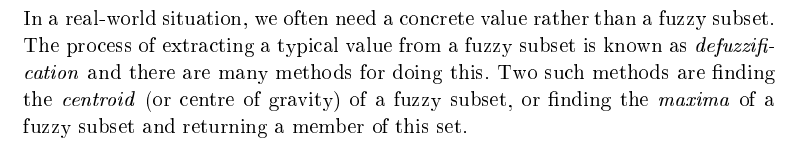

In [3]:
from IPython.core.display import Image
Image(filename=('images/defuzzn1.png'))

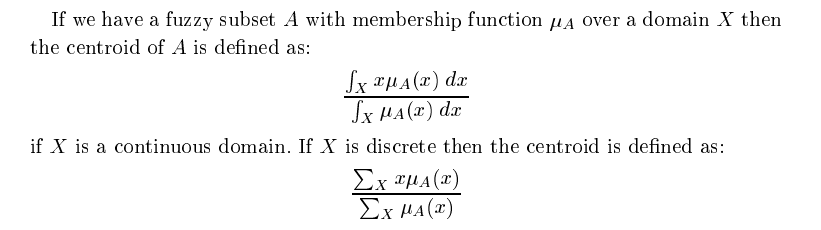

In [5]:
Image(filename=('images/defuzzn2.png'))

In [6]:
# a,b,m -> as defined above
# x -> point for which the membershi value is to be obtained
# return the correct membership value
def tri(a, b, x):
    #Your code here
    #raise NotImplementedError()
    a = float(a)
    b = float(b)
    m = (a + b) / 2.
    first = (x - a) / (m - a)
    second = (b - x) / (b - m)
    return max(min(first, second), 0.)

In [7]:
# a,b,c,d -> as defined above
# x -> point for which the membershi value is to be obtained
# return the correct membership value
def trap(a, b, c, d, x):
    #Your code here
    #raise NotImplementedError()
    a=float(a)
    b=float(b)
    c=float(c)
    d=float(d)
    first = (x - a) / (b - a)
    second = (d - x) / (d - c)
    return max(min(first, 1., second), 0.)

In [8]:
# domain-> list that describes the discrete fuzzy domain, 
# membership_function-> that gives value for the discrete points in the fuzzy domain
# return defuzzified value
def centroid(domain, membership_function):
    #Your code here
    #raise NotImplementedError()
    fdom = [membership_function(i) for i in domain]
    first = sum([a * b for (a, b) in zip(domain, fdom)])
    second = sum(fdom)
    return first / second


In [9]:
domain = [float(i) for i in range(0,10)] # Refer to https://goo.gl/CwFPSJ for 'map' docs
membership_function = partial(trap, 2, 3, 6, 9) # refer to https://goo.gl/prJvxV for 'partial' docs
print("Defuzzified value:",centroid(domain, membership_function))

NameError: name 'partial' is not defined

# 2. Fuzziness of a Fuzzy Subset

Fuzziness is an important property of a fuzzy set. It determines to what degree can a fuzzy set be represented by a discrete set. The more fuzzy a set is the more scattered the membership values of its componenents are.


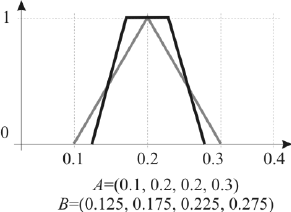

In [10]:
Image(filename=('images/fuzzn1.png'))

In the figure given above, set A is more fuzzy than set B.

In case of a more fuzzy set, the defuzzified value (let's say by using the centroid method) will be not a very good but a more approximate representation of the set than that in case of a less fuzzy one. 

The numerical measure of the fuzziness of a fuzzy set is as follows:

fuzziness(A) = 
     \begin{cases}
       \dfrac{2}{domain\_size} \sum_{n=1}^{domain\_size} \delta(\mu(A[n])),  \text{    where } \mu \text{ is the membership value of a particular element; } \delta \text{ = min(} \mu \text{, 1-} \mu \text{), domain_size->size of domain as described above}
\\
     \end{cases}



In [115]:
def fuzziness(domain, func):
    """The fuzziness of a fuzzy subset is the degree to which the values
    of its membership function cluster around 0.5

    :param domain: the domain of the function
    :type domain: list
    :param func: membership function
    :type func: function
    :returns: fuzziness value
    :rtype: float
    """
    #raise NotImplementedError()
    domain_size = float(len(domain))
    delta = lambda x: x if (x < 0.5) else (1.0 - x)
    result = (2. / domain_size) * sum([delta(func(val)) for val in domain])
    return result

In [116]:
medium = partial(tri, 0, 10)  # refer to https://goo.gl/prJvxV for 'partial' docs
domain=[float(i) for i in range(0,12)] 
print("Fuzziness of set:", fuzziness(domain, medium))

Fuzziness of set: 0.39999999999999997
